In [ ]:
import pandas as pd
df=pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<Axes: xlabel='Exited', ylabel='count'>

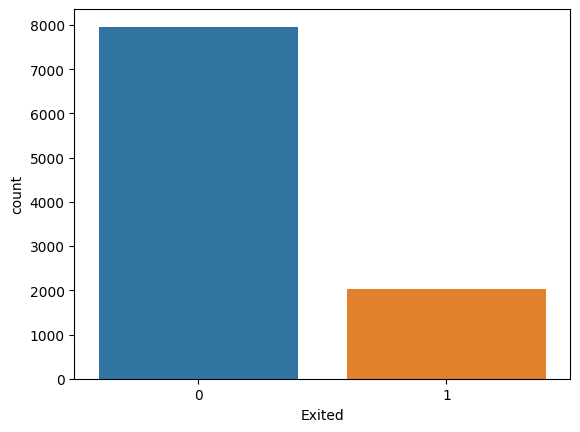

In [ ]:
import seaborn as sns
sns.countplot(data=df,x=df.Exited)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['Geography']=lb.fit_transform(df['Geography'])
df['Gender']=lb.fit_transform(df['Gender'])

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.drop(['Surname','RowNumber'],axis=1,inplace=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Load your dataset (assuming it's stored in a variable named 'data')
# data = pd.read_csv('your_dataset.csv')

# Assuming 'Exited' is the target variable and dropping it to get feature matrix X
X = df.drop('Exited', axis=1)

# 'Exited' column is set as the target variable
y = df['Exited']

# Initialize a RandomForestClassifier
clf = RandomForestClassifier()

# Fit the classifier to your data
clf.fit(X, y)

# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame to store feature names and their corresponding importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)


            Feature  Importance
4               Age    0.225521
7     NumOfProducts    0.129006
0        CustomerId    0.119664
10  EstimatedSalary    0.119204
6           Balance    0.117310
1       CreditScore    0.116388
5            Tenure    0.066880
9    IsActiveMember    0.039992
2         Geography    0.034765
8         HasCrCard    0.015668
3            Gender    0.015603


In [ ]:
from imblearn.combine import SMOTEENN

# Assuming 'X' and 'y' represent your features and target variable
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)


# Now you have balanced features (X_resampled) and labels (y_resampled)


In [ ]:
print('before smoteen : \n',y.value_counts(),'\nafter smoteen :\n',y_resampled.value_counts())

before smoteen : 
 0    7963
1    2037
Name: Exited, dtype: int64 
after smoteen :
 1    4436
0    3156
Name: Exited, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
scores={}
x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.25,random_state=100)
for i in range(500,1000,100):
  logs=LogisticRegression(solver='newton-cg',max_iter=i)
  logs.fit(x_train,y_train)
  scores[i]=logs.score(x_test,y_test)


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optim

{500: 0.809799789251844, 600: 0.809799789251844, 700: 0.809799789251844, 800: 0.809799789251844, 900: 0.809799789251844}


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


In [ ]:
print(scores)

{500: 0.809799789251844, 600: 0.809799789251844, 700: 0.809799789251844, 800: 0.809799789251844, 900: 0.809799789251844}


              precision    recall  f1-score   support

           0       0.79      0.74      0.76       777
           1       0.82      0.86      0.84      1121

    accuracy                           0.81      1898
   macro avg       0.81      0.80      0.80      1898
weighted avg       0.81      0.81      0.81      1898



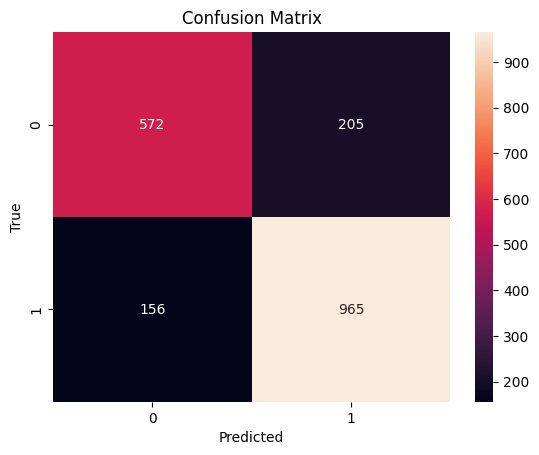

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
pred = logs.predict(x_test)
cm = confusion_matrix(y_test, pred)

# Plotting the confusion matrix heatmap
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Displaying the classification report
print(classification_report(y_test, pred))

In [ ]:
from sklearn.svm import SVC
sup=SVC(kernel='linear')
sup.fit(x_train,y_train)
sup.score(x_test,y_test)

0.5906217070600632

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Define a range of k values to test
k_values = list(range(1, 11))  # Testing k values from 1 to 10

# Dictionary to store mean cross-validation scores for each k value
k_scores = {}

# Perform k-fold cross-validation for each k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation on training data
    k_scores[k] = np.mean(scores)

# Find the best k value with the highest mean accuracy
best_k = max(k_scores, key=k_scores.get)
best_accuracy = k_scores[best_k]

print(f"The best k value is {best_k} with mean accuracy: {best_accuracy:.4f}")

# Train the model with the best k value on the full training set
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(x_train, y_train)

# Evaluate the model on the test set
test_accuracy = best_knn.score(x_test, y_test)
print(f"Accuracy on the test set with best k value: {test_accuracy:.4f}")


The best k value is 1 with mean accuracy: 0.9563
Accuracy on the test set with best k value: 0.9705


In [ ]:
k_scores

{1: 0.9562697213817195,
 2: 0.936599489886451,
 3: 0.9037576513174848,
 4: 0.8851425185660655,
 5: 0.8570418351743813,
 6: 0.8537055752972963,
 7: 0.8273620525512622,
 8: 0.8245531877467824,
 9: 0.8062892402455827,
 10: 0.8031285729936073}

In [ ]:
predy=best_knn.predict(x_test)
print(classification_report(y_test,predy))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       777
           1       0.97      0.98      0.98      1121

    accuracy                           0.97      1898
   macro avg       0.97      0.97      0.97      1898
weighted avg       0.97      0.97      0.97      1898



<Axes: >

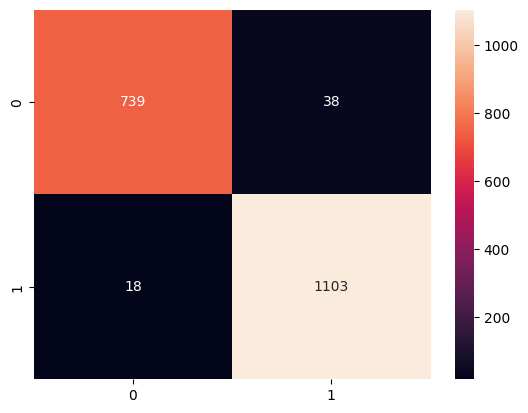

In [ ]:
sns.heatmap(confusion_matrix(y_test,predy), annot=True, fmt='d')

In [ ]:
df

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
best_knn.predict([[15682355,772,1,1,42,3,75075.31,2,1,0,92888.52]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
df.sample(5)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3259,15778830,841,0,1,31,2,0.00,2,1,0,173240.52,0
2957,15789109,686,0,0,41,10,0.00,1,1,1,144272.71,1
5778,15640377,526,0,0,36,0,0.00,2,1,0,97767.63,0
2472,15623196,686,0,1,38,6,149238.97,1,1,1,97825.23,0
4586,15664895,602,0,0,25,0,0.00,2,1,1,101274.17,0
